<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">Title: Car Price Prediction</h1>

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨‍💻Author: Muhammad Mubashir</h1>

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-mubashir-4441072ba/)


[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:mubashir.dev.02@gmail.com)


`Dataset:` [Car Price Prediction](https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars)\
`Date: `2024/06/08

# About Dataset

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model

# Table of Contents

1. [Importing Libraries](#importing-libraries)
2. [Load data](#load-data)
3. [Missing Values](#missing-values)
4. [Duplicate Values](#duplicate-values)
5. [Descriptive Statistics](#descriptive-statistics)
6. [EDA & Data Visualization](#eda--data-visualization)
7. [Encoding](#encoding)
8. [Feature Selection](#feature-selection)
9. [Best Model Selection & Evaluation](#best-model-selection--evaluation)


## Importing Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

## Load Data

In [3]:
df = pd.read_csv('./car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

- No missing values in the dataset 

## Duplicate Values

In [7]:
df.duplicated().sum()

2

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

## Descriptive Statistics

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## EDA & Data Visualization

### Correlation Heatmap

<Axes: >

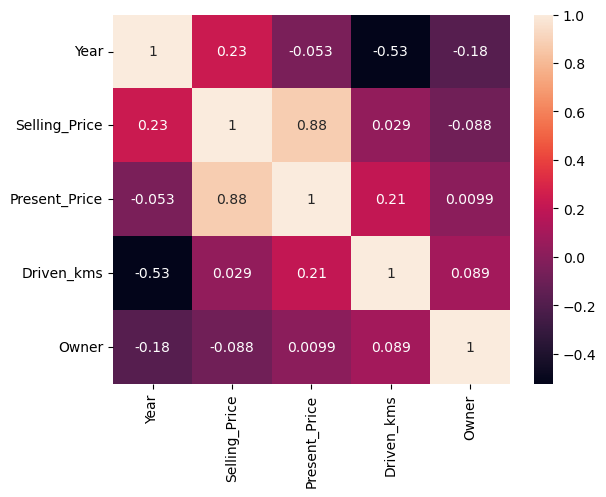

In [14]:
# extract numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# plot heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True)

- As year increase the selling price also tends to increase by 23% 
- Year has negative impact on present price, driven kms, and owner.

### Line Plot

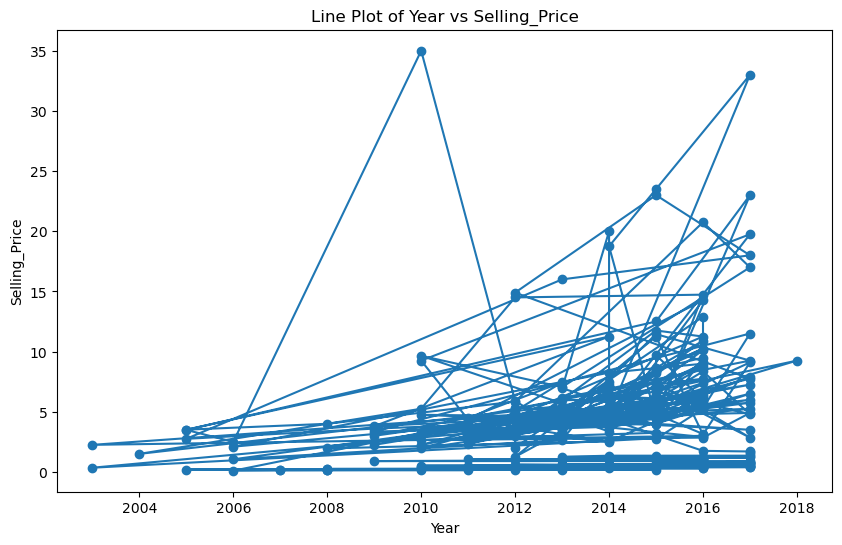

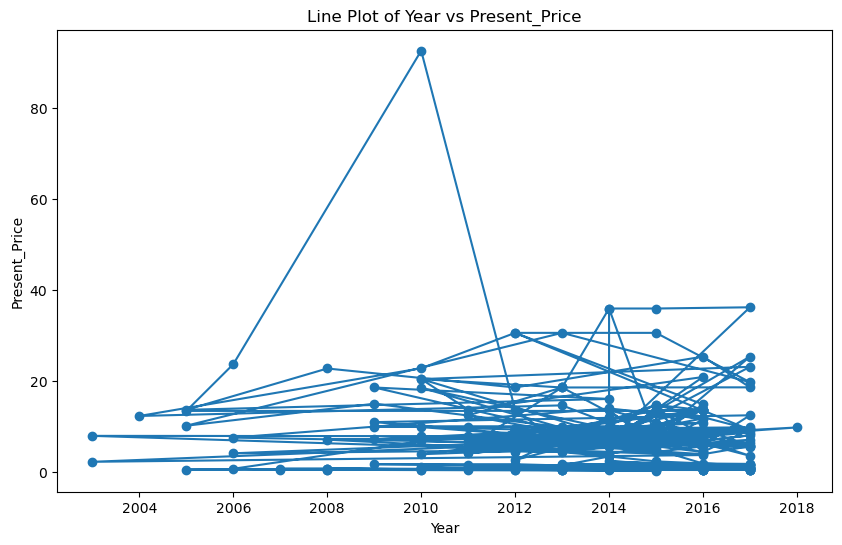

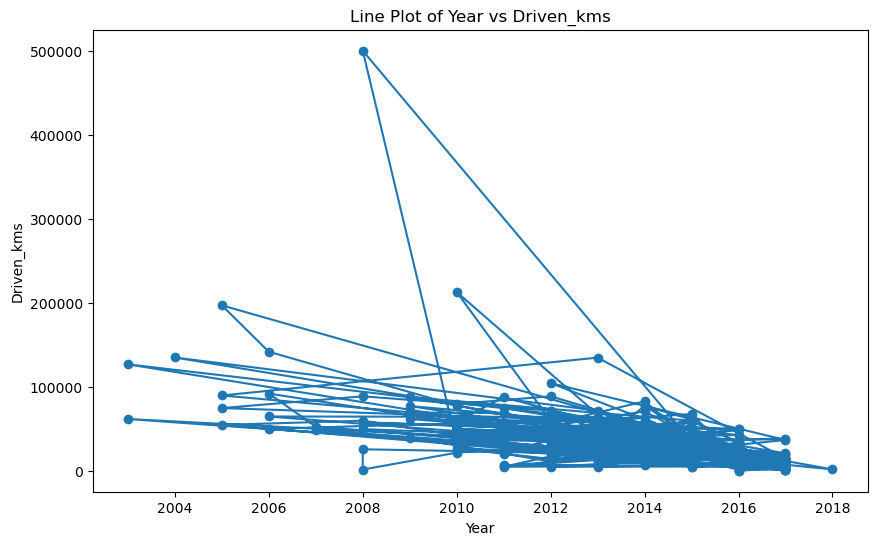

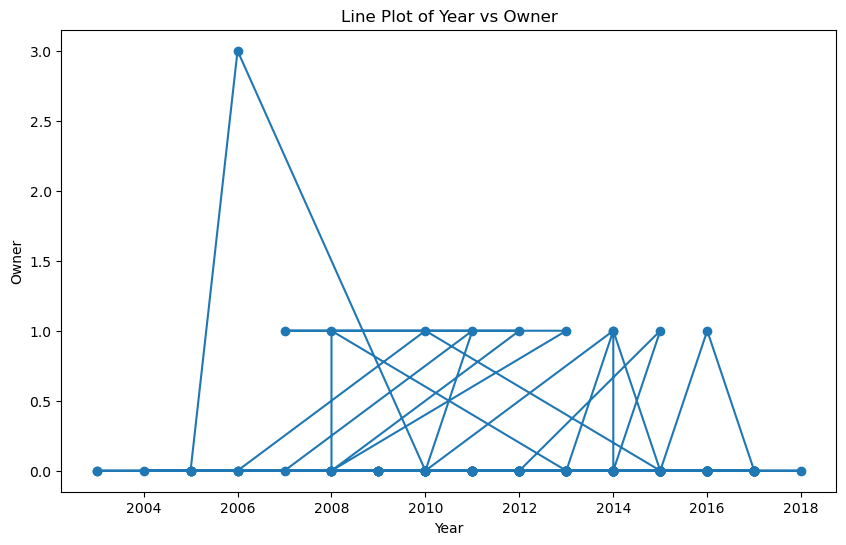

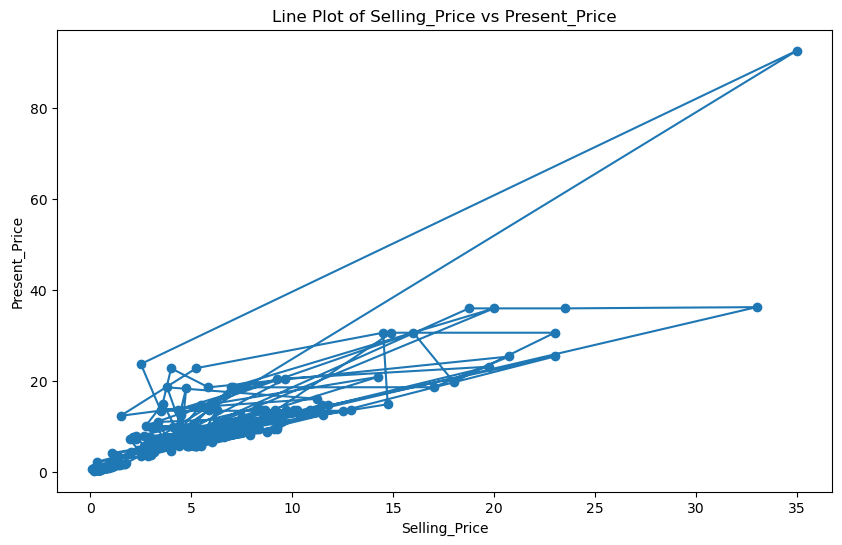

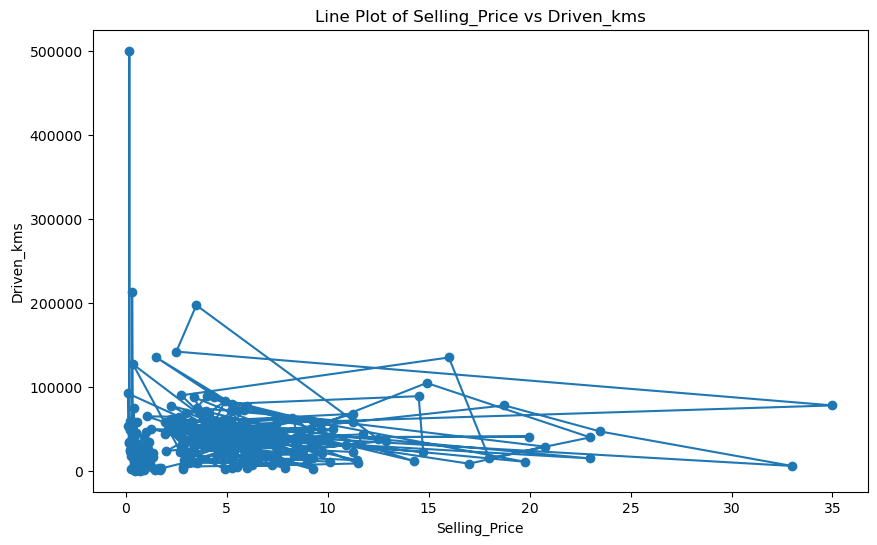

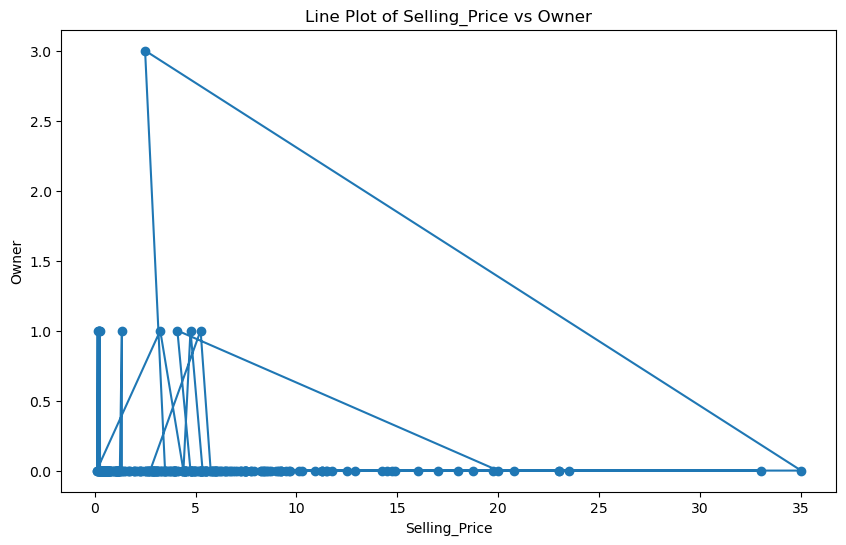

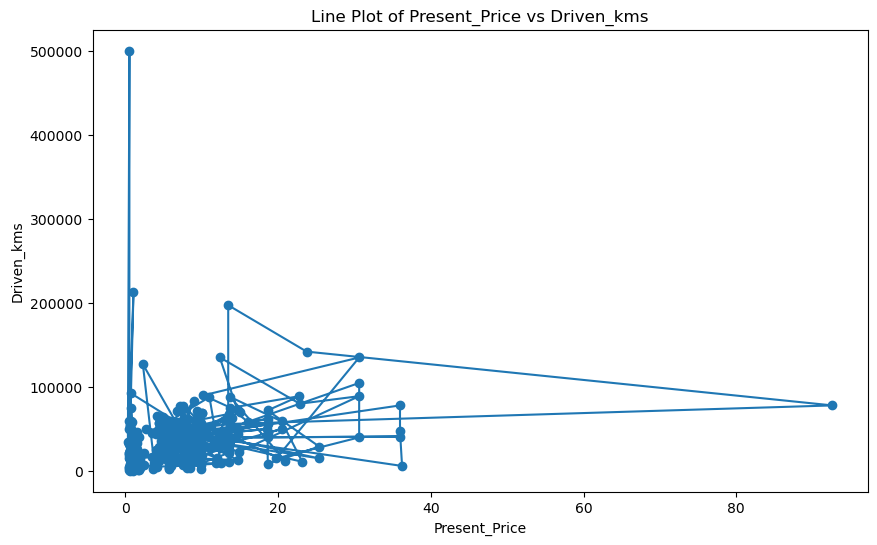

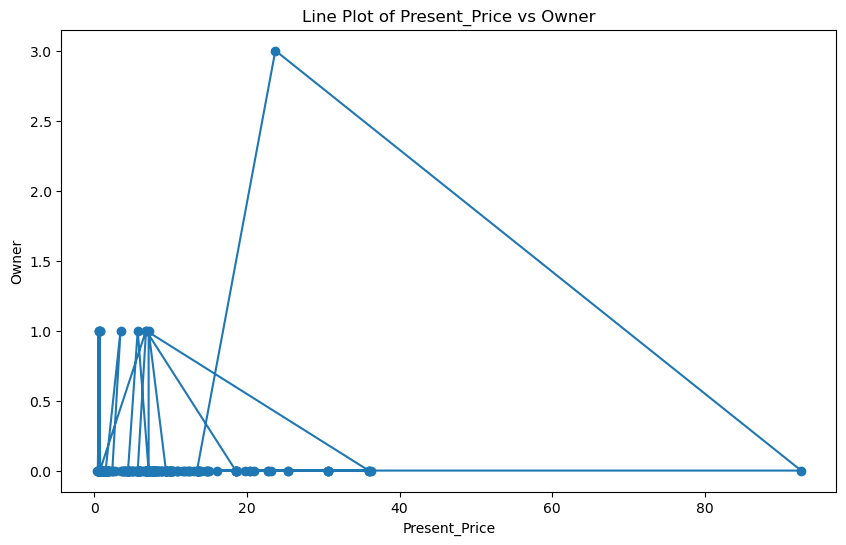

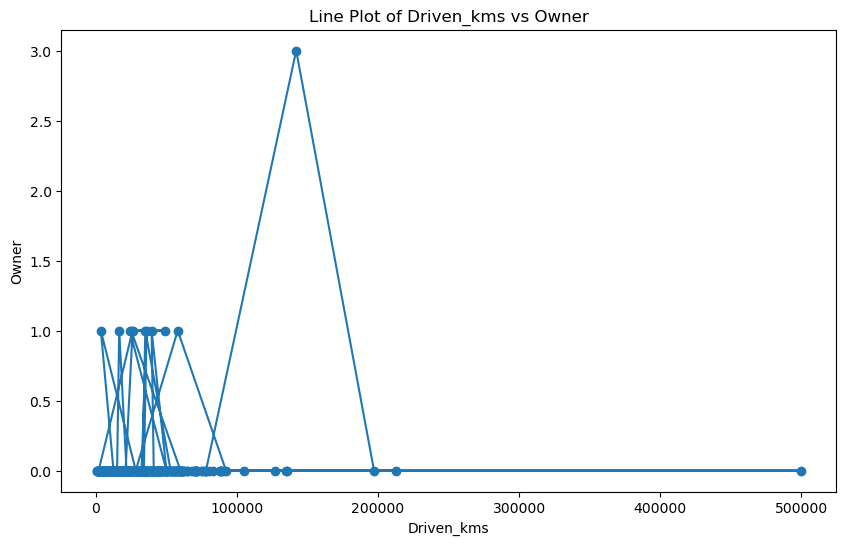

In [22]:
# Plot line plots for each pair of numerical columns
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        plt.plot(df[col_x], df[col_y], marker='o')
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'Line Plot of {col_x} vs {col_y}')
        plt.show()

### Scatter plot

In [27]:
# plot the scatter plots for each pair of numerical columns using plotly
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        fig = px.scatter(df, x=col_x, y=col_y, title=f'Scatter Plot of {col_x} vs {col_y}')
        fig.show()


### Box plot

In [28]:
# extract categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# box plot of categorical columns vs numerical columns
for col_x in categorical_cols:
    for col_y in numerical_cols:
        fig = px.box(df, x=col_x, y=col_y, title=f'Box Plot of {col_x} vs {col_y}')
        fig.show()

### Histogram

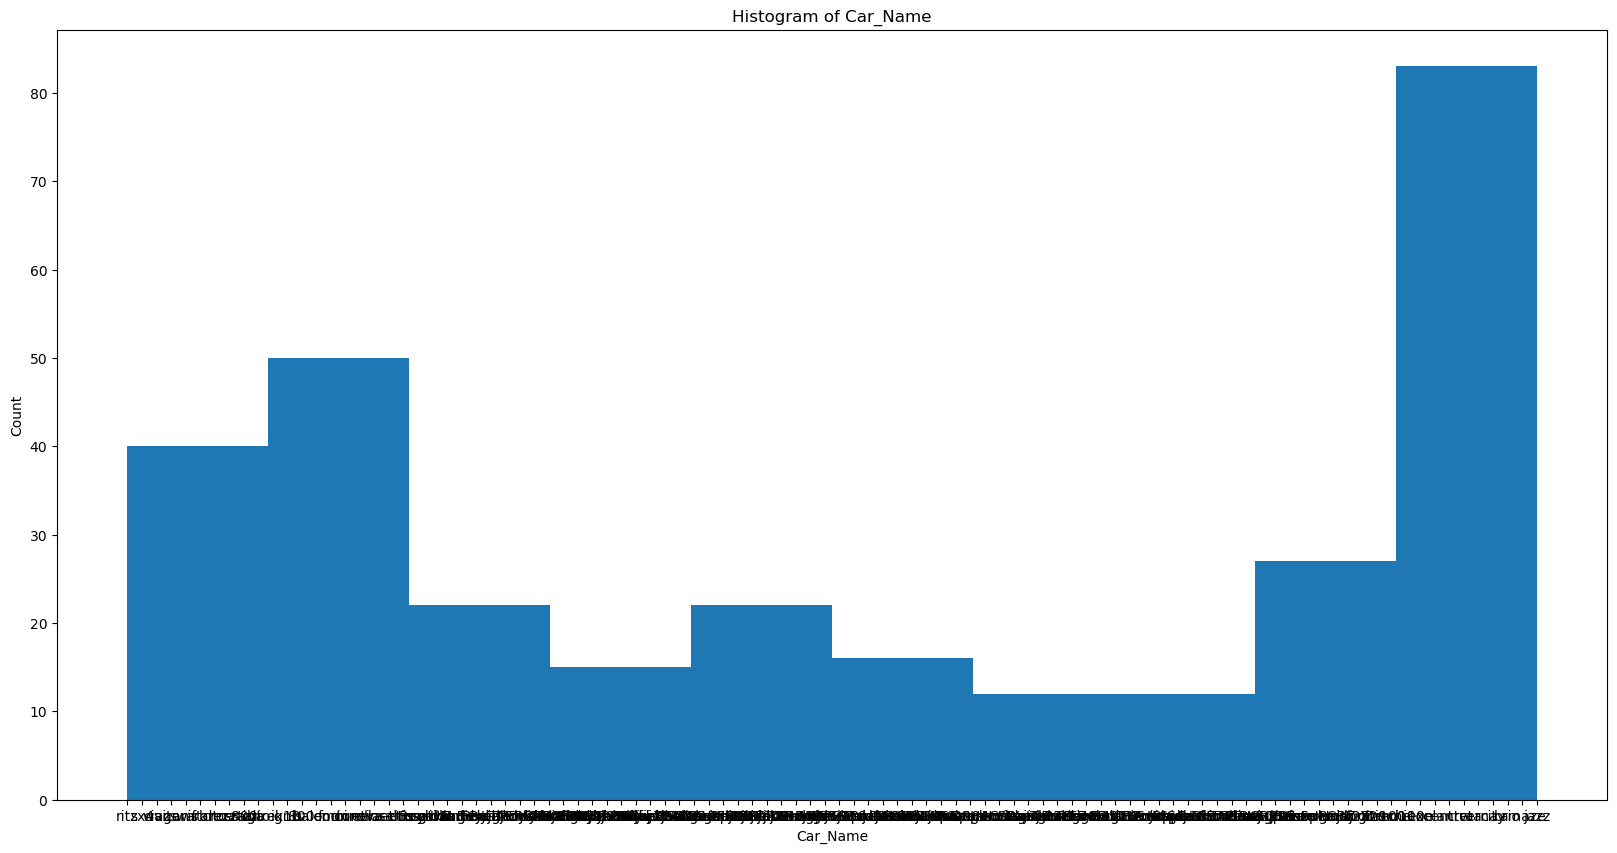

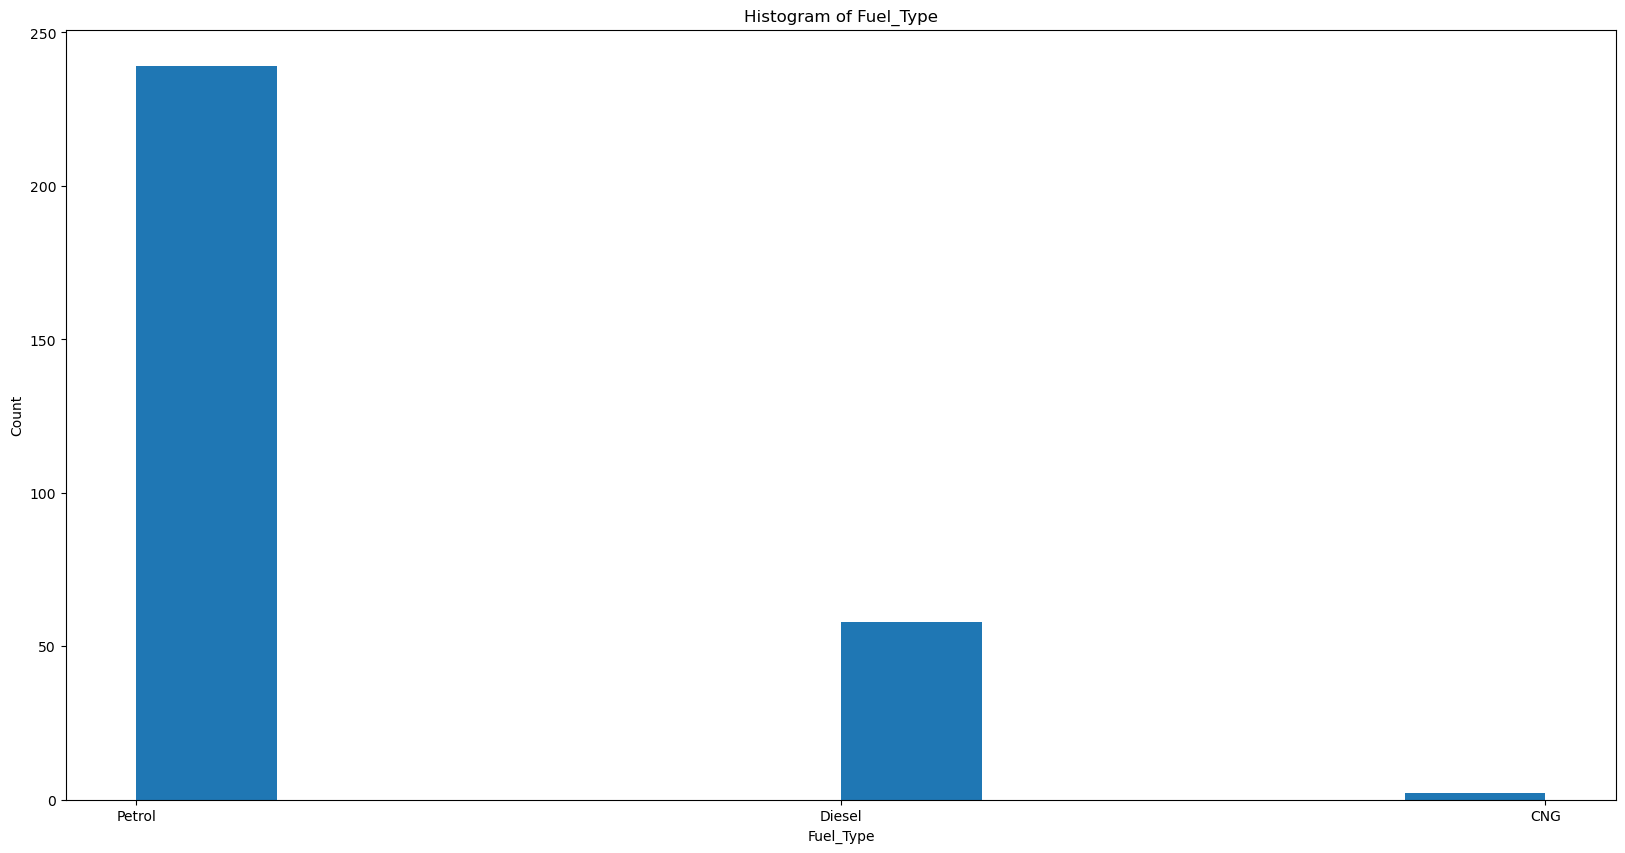

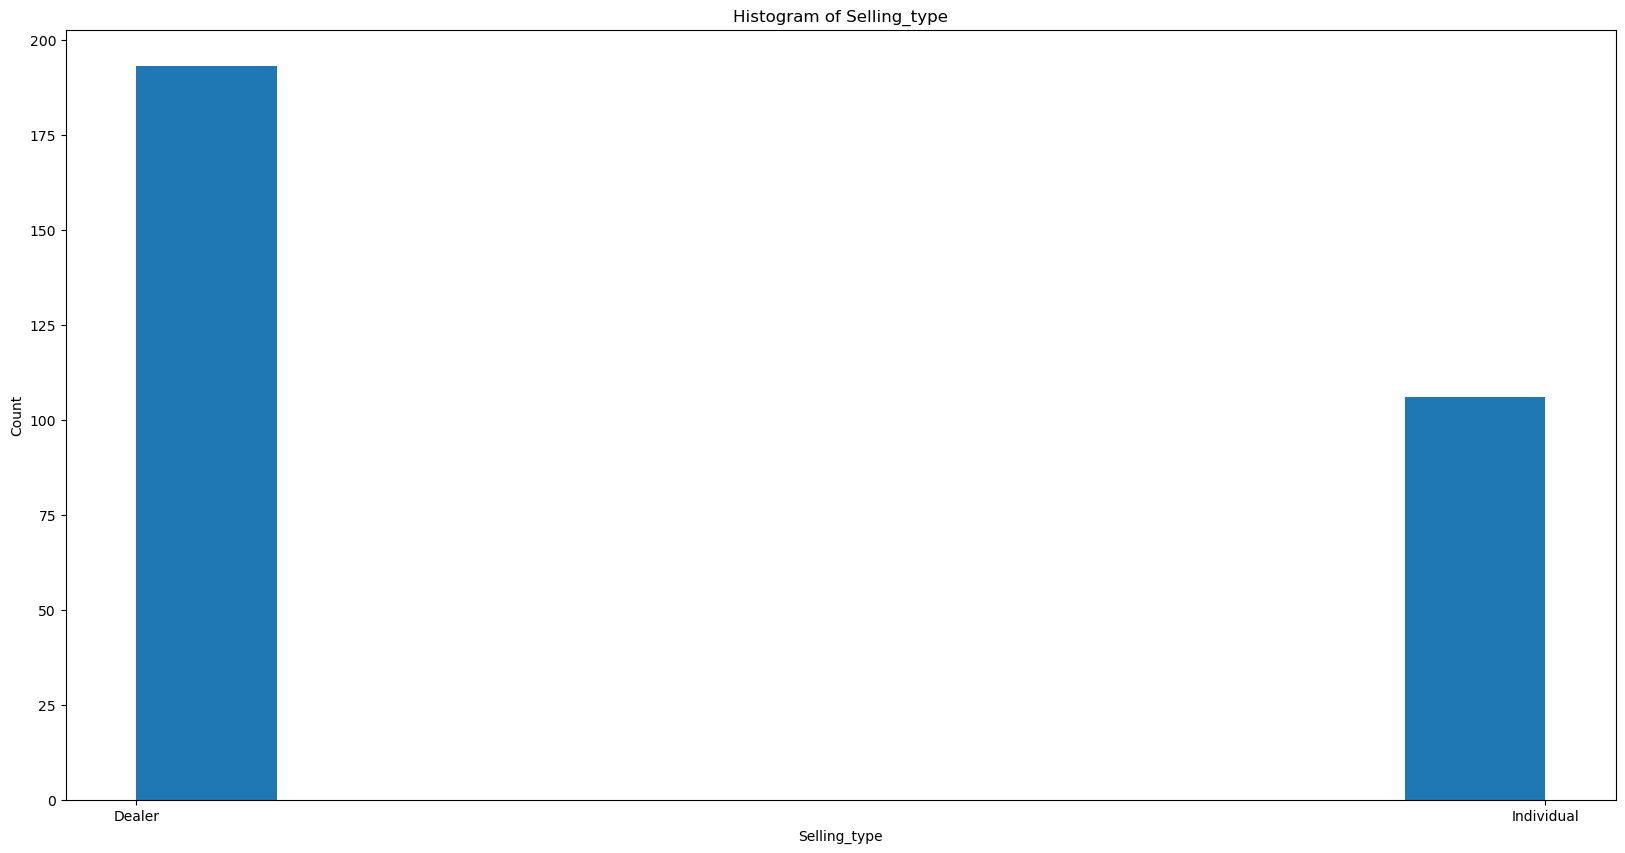

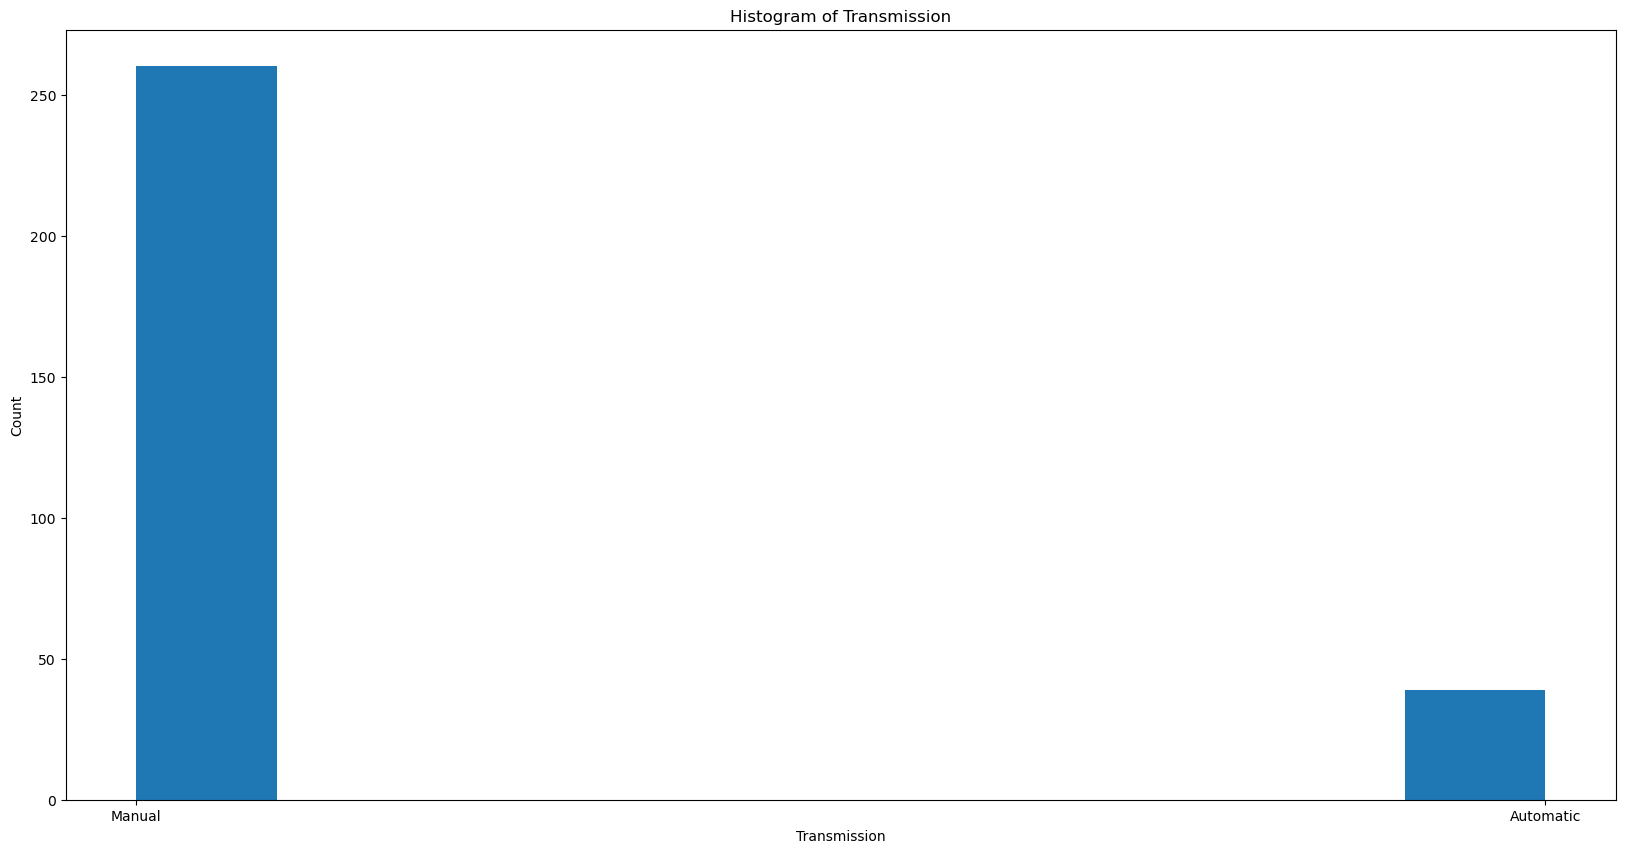

In [30]:
# plot histogram of each categorical column using matplotlib
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()


## Encoding

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [32]:
## label encoder
le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [34]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


## Feature Selection

In [36]:
# best feature selection using correlation
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Selling_Price"].sort_values(ascending=False)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 Selling_Price    1.000000
Present_Price    0.876305
Car_Name         0.501429
Year             0.234369
Driven_kms       0.028566
Owner           -0.087880
Transmission    -0.348869
Fuel_Type       -0.500292
Selling_type    -0.553851
Name: Selling_Price, dtype: float64


In [40]:
# Define a threshold
threshold = 0.5
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index
print("Selected features:\n", selected_features)

Selected features:
 Index(['Selling_Price', 'Present_Price', 'Car_Name', 'Fuel_Type',
       'Selling_type'],
      dtype='object')


### Scaling

In [45]:
X = df[selected_features].drop('Selling_Price', axis=1)
y = df['Selling_Price']

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.22813821,  1.07634401,  0.49184668, -0.74109567],
       [ 0.23374233,  1.1936136 , -1.88012358, -0.74109567],
       [ 0.26999119,  0.21636698,  0.49184668, -0.74109567],
       ...,
       [ 0.40446274,  0.25545684,  0.49184668, -0.74109567],
       [ 0.57986041,  0.25545684, -1.88012358, -0.74109567],
       [-0.19188936,  0.13818725,  0.49184668, -0.74109567]])

### Spliting the data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Best Model Selection & Evaluation

### Enlist the models that will be used
1- Linear Regression\
2- Random Forest\
3- Gradient Boosting\
4- Support Vector Machine\
5- K-Nearest Neighbors\
6- Decision Tree\
7- Ada Boost

In [59]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Ada Boost', AdaBoostRegressor(random_state=42))
]

# Initialize variables to track the best model and its metrics
best_model = None
best_mse = np.inf  # Initialize with infinity
best_r2 = -np.inf  # Initialize with negative infinity

# Initialize lists to store the results
model_names = []
mse_scores = []
r2_scores = []

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    mse = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Mean Squared Error:", mse)
    print("Cross-validation R-squared:", r2)
    print()
    
    # Store the results
    model_names.append(name)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # Check if the current model has the best MSE
    if mse < best_mse:
        best_mse = mse
        best_model = pipeline

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})

# Select the best model based on MSE
best_model_name = results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model']
best_model_row = results_df.loc[results_df['Model'] == best_model_name]

# Print the best model and its metrics
print("\nBest Model (Based on Mean Squared Error):")
print(best_model_row)
print()

Model: Random Forest
Cross-validation Mean Squared Error: 4.537182843907494
Cross-validation R-squared: 0.8013117821077206

Model: Gradient Boosting
Cross-validation Mean Squared Error: 4.647906291221718
Cross-validation R-squared: 0.8020143267079215

Model: Support Vector Machine
Cross-validation Mean Squared Error: 10.059363255275375
Cross-validation R-squared: 0.6317239836360529

Model: Linear Regression
Cross-validation Mean Squared Error: 5.3198753268632535
Cross-validation R-squared: 0.7856665238373381

Model: K-Nearest Neighbors
Cross-validation Mean Squared Error: 4.885189814539007
Cross-validation R-squared: 0.792492745207241

Model: Decision Tree
Cross-validation Mean Squared Error: 6.02268770505661
Cross-validation R-squared: 0.7280723704894922

Model: Ada Boost
Cross-validation Mean Squared Error: 4.7432232078162
Cross-validation R-squared: 0.7975062536317571


Best Model (Based on Mean Squared Error):
           Model  Mean Squared Error  R-squared
0  Random Forest        

In [61]:
# Display the results DataFrame
print("Results:")
print(results_df)

Results:
                    Model  Mean Squared Error  R-squared
0           Random Forest            4.537183   0.801312
1       Gradient Boosting            4.647906   0.802014
2  Support Vector Machine           10.059363   0.631724
3       Linear Regression            5.319875   0.785667
4     K-Nearest Neighbors            4.885190   0.792493
5           Decision Tree            6.022688   0.728072
6               Ada Boost            4.743223   0.797506


In [62]:
# save the model
pickle.dump(best_model, open('car_price_prediction.pkl', 'wb'))

## Conclusion
`Overall Random forest and Gradient Boosting works well.`

## Contact
`Thank you, for exploring this project. If you found helpful keep upvoting this notebook.`\
Feel free to contact in comment section or mail me at `mubashir.dev.02@gmail.com`